In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np
plt.rcParams['figure.figsize'] = [17, 17]

In [2]:
from harmony import ChromaticNecklace

In [3]:
G = nx.Graph()

In [4]:
init = ChromaticNecklace('major', 0)

In [5]:
edges, togo = [], [init]

In [6]:
while togo:
    current = togo.pop()
    for idx in range(7):
        if current.movable(idx):
            adjecent = current.move(idx)
            edge = (
                (current.name, current.color),
                (adjecent.name, adjecent.color)
            )
            if edge not in G.edges:
                G.add_edge(*edge, edge_label=idx)
                togo.append(adjecent)

In [7]:
indices = [(x*7) % 12 for x in range(12)]
phi = ((np.sqrt(5)+1)/2)

In [8]:
# Check different orderings
scales = ['harmonic_major', 'harmonic_minor', 'major', 'melodic_minor']
offsets = [-1, -2, 0, -1]
def layout(graph):
    nodes = graph.nodes
    theta = [(3 - indices[n[1]] - offsets[scales.index(n[0])]) * (np.pi / 6) for n in nodes]
    rad = [scales.index(n[0])**1.1 for n in nodes]
    rad =[r*2 + 5 for r in rad]
    return {n: (r * np.cos(t), r * np.sin(t)) for n, r, t in zip(nodes, rad, theta)}

In [9]:
def to_label(node):
    mapping = {'major': 'M', 'melodic_minor': 'mm', 'harmonic_minor': 'hm', 'harmonic_major': 'HM'}
    return f'{mapping[node[0]]}{node[1]}'

In [10]:
colors = {}
for x in G.edges.data():
    colors[x[:2]] = x[2]['edge_label']+1

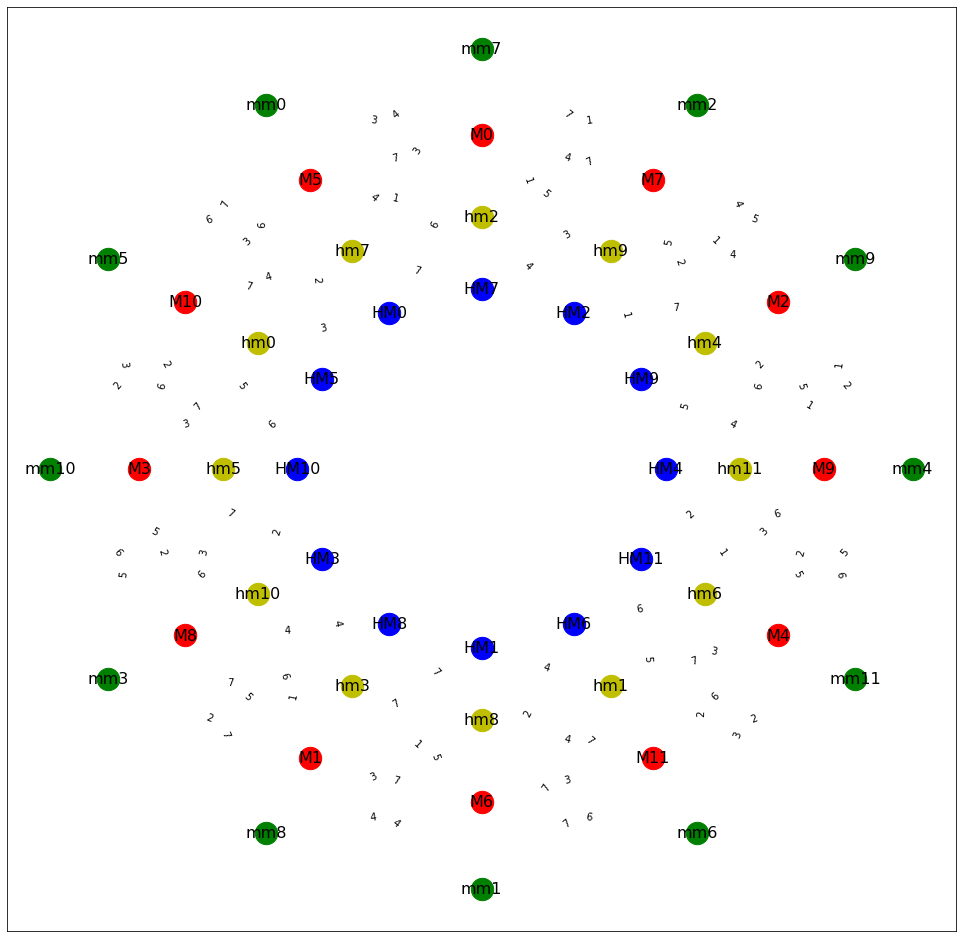

In [16]:
majors = [n for n in G.nodes if n[0] == 'major']
melodic_minors = [n for n in G.nodes if n[0] == 'melodic_minor']
harmonic_majors = [n for n in G.nodes if n[0] == 'harmonic_major']
harmonic_minors = [n for n in G.nodes if n[0] == 'harmonic_minor']

labels = {node: to_label(node) for node in G.nodes}
pos = layout(G)

nx.draw_networkx_nodes(G, pos, nodelist=majors, node_color="r", node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=melodic_minors, node_color="g", node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=harmonic_majors, node_color="b", node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=harmonic_minors, node_color="y", node_size=500)
nx.draw_networkx_labels(G, pos, labels, font_size=16)

nx.draw_networkx_edges(
    G,
    pos,
    edgelist=edges,
    width=5,
    alpha=0.5,
    edge_color="b",
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=colors)

plt.show()

In [12]:
pred, dist = nx.dijkstra_predecessor_and_distance(G, ('major', 0))

In [13]:
dist

{('major', 0): 0,
 ('melodic_minor', 2): 1,
 ('major', 7): 1,
 ('harmonic_minor', 9): 1,
 ('major', 5): 1,
 ('melodic_minor', 0): 1,
 ('harmonic_major', 0): 1,
 ('harmonic_minor', 2): 2,
 ('major', 2): 2,
 ('harmonic_major', 9): 2,
 ('melodic_minor', 7): 2,
 ('harmonic_minor', 4): 2,
 ('melodic_minor', 9): 2,
 ('harmonic_major', 7): 2,
 ('harmonic_major', 5): 2,
 ('major', 10): 2,
 ('melodic_minor', 5): 2,
 ('harmonic_minor', 0): 2,
 ('harmonic_major', 2): 3,
 ('melodic_minor', 4): 3,
 ('major', 9): 3,
 ('harmonic_minor', 11): 3,
 ('harmonic_minor', 7): 3,
 ('harmonic_major', 4): 3,
 ('melodic_minor', 10): 3,
 ('harmonic_minor', 5): 3,
 ('major', 3): 3,
 ('harmonic_major', 10): 3,
 ('major', 4): 4,
 ('harmonic_major', 11): 4,
 ('harmonic_minor', 6): 4,
 ('melodic_minor', 11): 4,
 ('major', 8): 4,
 ('harmonic_minor', 10): 4,
 ('harmonic_major', 3): 4,
 ('melodic_minor', 3): 4,
 ('melodic_minor', 6): 5,
 ('major', 11): 5,
 ('harmonic_minor', 1): 5,
 ('harmonic_major', 6): 5,
 ('harmonic_

In [14]:
paths = nx.shortest_paths.all_shortest_paths(G, ('melodic_minor', 2), ('melodic_minor', 8))

In [15]:
for p in paths:
    print('=====================')
    print(len(p))
    print(p)

7
[('melodic_minor', 2), ('major', 0), ('major', 5), ('harmonic_major', 5), ('melodic_minor', 10), ('major', 8), ('melodic_minor', 8)]
7
[('melodic_minor', 2), ('harmonic_minor', 2), ('major', 5), ('harmonic_major', 5), ('melodic_minor', 10), ('major', 8), ('melodic_minor', 8)]
7
[('melodic_minor', 2), ('major', 0), ('major', 5), ('major', 10), ('melodic_minor', 10), ('major', 8), ('melodic_minor', 8)]
7
[('melodic_minor', 2), ('harmonic_minor', 2), ('major', 5), ('major', 10), ('melodic_minor', 10), ('major', 8), ('melodic_minor', 8)]
7
[('melodic_minor', 2), ('major', 0), ('melodic_minor', 0), ('major', 10), ('melodic_minor', 10), ('major', 8), ('melodic_minor', 8)]
7
[('melodic_minor', 2), ('major', 0), ('major', 5), ('harmonic_major', 5), ('harmonic_minor', 5), ('major', 8), ('melodic_minor', 8)]
7
[('melodic_minor', 2), ('harmonic_minor', 2), ('major', 5), ('harmonic_major', 5), ('harmonic_minor', 5), ('major', 8), ('melodic_minor', 8)]
7
[('melodic_minor', 2), ('major', 0), ('maj